In [1]:
import chess
import chess.pgn as pgn
import chess.engine
import numpy as np
from copy import deepcopy

In [2]:
piece_score = {'P': 1, 'p': 1, 'N': 3, 'n': 3, 'B': 3, 'b': 3, 'R': 5, 'r': 5, 'Q': 9, 'q': 9, 'K': 10, 'k': 10}
central_squares=list(range(18,22))+list(range(26,30))+list(range(34,38))+list(range(42,50))
board=chess.Board()
board.legal_moves

<LegalMoveGenerator at 0x7ff28872bd90 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

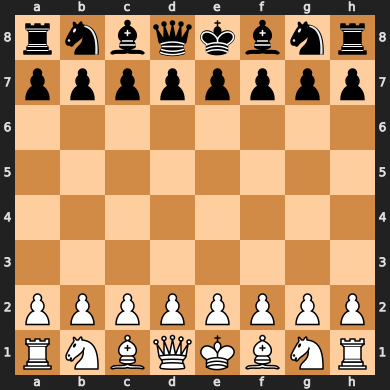

In [3]:
board

In [4]:
board.piece_at(0).piece_type

4

In [4]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [5]:
game_pgn = open("../famous-games/anderssen_kieseritzky_1851.pgn")
game=pgn.read_game(game_pgn)
print(game.headers)
print(game.mainline_moves())

Headers(Event='Casual game', Site='London ENG', Date='1851.06.21', Round='?', White='Adolf Anderssen', Black='Lionel Adalbert Bagration Felix Kieseritzky', Result='1-0', BlackElo='?', ECO='C33', EventDate='?', PlyCount='45', WhiteElo='?')
1. e4 e5 2. f4 exf4 3. Bc4 Qh4+ 4. Kf1 b5 5. Bxb5 Nf6 6. Nf3 Qh6 7. d3 Nh5 8. Nh4 Qg5 9. Nf5 c6 10. g4 Nf6 11. Rg1 cxb5 12. h4 Qg6 13. h5 Qg5 14. Qf3 Ng8 15. Bxf4 Qf6 16. Nc3 Bc5 17. Nd5 Qxb2 18. Bd6 Bxg1 { It is from this move that Black's defeat stems. Wilhelm
Steinitz suggested in 1879 that a better move would be
18... Qxa1+; likely moves to follow are 19. Ke2 Qb2 20. Kd2
Bxg1. } 19. e5 Qxa1+ 20. Ke2 Na6 21. Nxg7+ Kd8 22. Qf6+ Nxf6 23. Be7#


In [6]:
print(game)

[Event "Casual game"]
[Site "London ENG"]
[Date "1851.06.21"]
[Round "?"]
[White "Adolf Anderssen"]
[Black "Lionel Adalbert Bagration Felix Kieseritzky"]
[Result "1-0"]
[BlackElo "?"]
[ECO "C33"]
[EventDate "?"]
[PlyCount "45"]
[WhiteElo "?"]

1. e4 e5 2. f4 exf4 3. Bc4 Qh4+ 4. Kf1 b5 5. Bxb5 Nf6 6. Nf3 Qh6 7. d3 Nh5 8. Nh4 Qg5 9. Nf5 c6 10. g4 Nf6 11. Rg1 cxb5 12. h4 Qg6 13. h5 Qg5 14. Qf3 Ng8 15. Bxf4 Qf6 16. Nc3 Bc5 17. Nd5 Qxb2 18. Bd6 Bxg1 { It is from this move that Black's defeat stems. Wilhelm
Steinitz suggested in 1879 that a better move would be
18... Qxa1+; likely moves to follow are 19. Ke2 Qb2 20. Kd2
Bxg1. } 19. e5 Qxa1+ 20. Ke2 Na6 21. Nxg7+ Kd8 22. Qf6+ Nxf6 23. Be7# 1-0


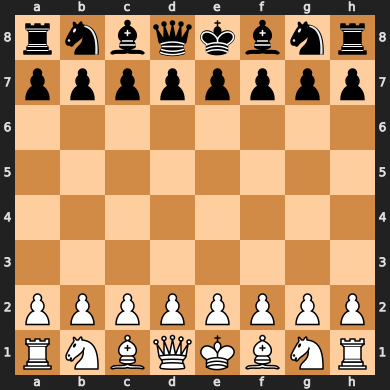

In [7]:
board = game.board()
board

In [8]:
board.fullmove_number

1

In [9]:
for move in game.mainline_moves():
    board.push(move)

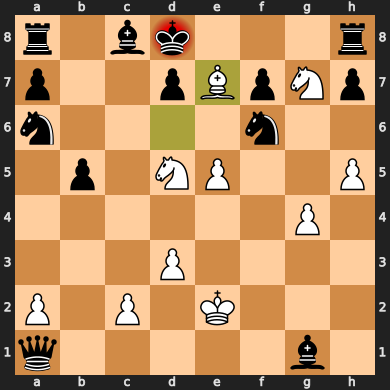

In [10]:
board

In [11]:
board.is_checkmate()

True

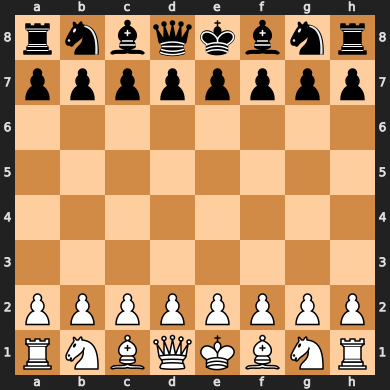

In [12]:
board.reset_board()
board

In [13]:
board.reset_board()
for i, move in enumerate(game.mainline_moves()):
    print(i)
    board.push(move)
    print(board)
    print('################')

0
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . p . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
################
1
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . P . . .
. . . . p . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
################
2
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . P . . .
. . . . p p . .
. . . . . . . .
P P P P . . P P
R N B Q K B N R
################
3
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . . . p P . .
. . . . . . . .
P P P P . . P P
R N B Q K B N R
################
4
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . b . p P . .
. . . . . . . .
P P P P . . P P
R N B Q K . N R
################
5
r n b . k b n r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . b . p P . Q
. . . . . . . .
P P P P . . P P
R N B Q K . N R
################
6
r n b . k b n r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . b . p P . Q
. . . . . . . .
P P P P . . P P
R N 

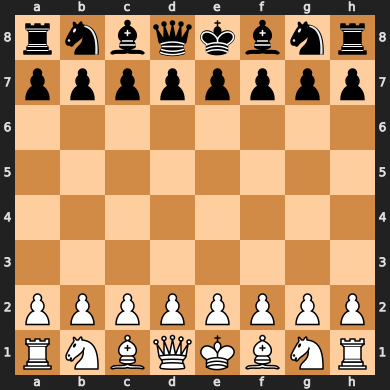

In [14]:
board.reset_board()
board

In [15]:
moves=game.mainline_moves()

In [16]:
for i, move in enumerate(moves):
    print(i, move)

0 e2e4
1 e7e5
2 f2f4
3 e5f4
4 f1c4
5 d8h4
6 e1f1
7 b7b5
8 c4b5
9 g8f6
10 g1f3
11 h4h6
12 d2d3
13 f6h5
14 f3h4
15 h6g5
16 h4f5
17 c7c6
18 g2g4
19 h5f6
20 h1g1
21 c6b5
22 h2h4
23 g5g6
24 h4h5
25 g6g5
26 d1f3
27 f6g8
28 c1f4
29 g5f6
30 b1c3
31 f8c5
32 c3d5
33 f6b2
34 f4d6
35 c5g1
36 e4e5
37 b2a1
38 f1e2
39 b8a6
40 f5g7
41 e8d8
42 f3f6
43 g8f6
44 d6e7


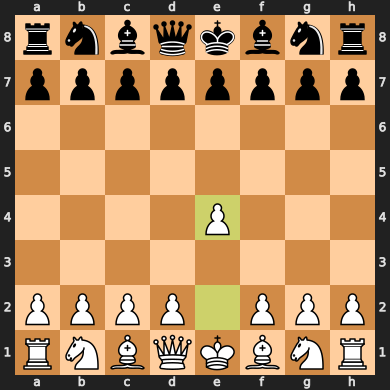

In [17]:
board.reset_board()
board.push(chess.Move.from_uci('e2e4'))
board

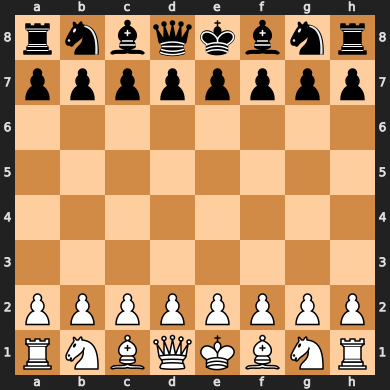

In [18]:
board.pop()
board

In [19]:
stockfish = chess.engine.SimpleEngine.popen_uci(r"/opt/homebrew/Cellar/stockfish/14.1/bin/stockfish")
board.reset()
eng_move=stockfish.play(board, chess.engine.Limit(time=0.1))
print(eng_move)

<PlayResult at 0x7fc96938ab20 (move=e2e4, ponder=c7c5, info={}, draw_offered=False, resigned=False)>


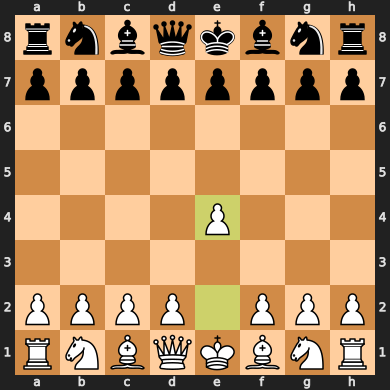

In [20]:
eng_move=stockfish.play(board, chess.engine.Limit(time=0.1))
board.push(eng_move.move)
board

In [21]:
board.reset()
for _, move in enumerate(game.mainline_moves()):
    board.push(move)

In [22]:
board.move_stack

[Move.from_uci('e2e4'),
 Move.from_uci('e7e5'),
 Move.from_uci('f2f4'),
 Move.from_uci('e5f4'),
 Move.from_uci('f1c4'),
 Move.from_uci('d8h4'),
 Move.from_uci('e1f1'),
 Move.from_uci('b7b5'),
 Move.from_uci('c4b5'),
 Move.from_uci('g8f6'),
 Move.from_uci('g1f3'),
 Move.from_uci('h4h6'),
 Move.from_uci('d2d3'),
 Move.from_uci('f6h5'),
 Move.from_uci('f3h4'),
 Move.from_uci('h6g5'),
 Move.from_uci('h4f5'),
 Move.from_uci('c7c6'),
 Move.from_uci('g2g4'),
 Move.from_uci('h5f6'),
 Move.from_uci('h1g1'),
 Move.from_uci('c6b5'),
 Move.from_uci('h2h4'),
 Move.from_uci('g5g6'),
 Move.from_uci('h4h5'),
 Move.from_uci('g6g5'),
 Move.from_uci('d1f3'),
 Move.from_uci('f6g8'),
 Move.from_uci('c1f4'),
 Move.from_uci('g5f6'),
 Move.from_uci('b1c3'),
 Move.from_uci('f8c5'),
 Move.from_uci('c3d5'),
 Move.from_uci('f6b2'),
 Move.from_uci('f4d6'),
 Move.from_uci('c5g1'),
 Move.from_uci('e4e5'),
 Move.from_uci('b2a1'),
 Move.from_uci('f1e2'),
 Move.from_uci('b8a6'),
 Move.from_uci('f5g7'),
 Move.from_uci('

Stockfish library - https://pypi.org/project/stockfish/2.0/

In [23]:
# from stockfish import Stockfish
# stockfish = Stockfish(path="/opt/homebrew/Cellar/stockfish/14.1/bin/stockfish")
# print(f'best move: {stockfish.get_best_move()}')
# print(stockfish.get_board_visual())
# stockfish.set_position(["e2e4", "e7e6"])
# print(stockfish.get_board_visual())
# stockfish.get_best_move()

In [24]:
board.reset()
board.push(chess.Move.from_uci('e2e4'))
board.push(chess.Move.from_uci('e7e5'))
board.push(chess.Move.from_uci('f2f4'))
board.push(chess.Move.from_uci('e5f4'))
board.push(chess.Move.from_uci('f1c4'))
board.push(chess.Move.from_uci('d8e7'))
board.push(chess.Move.from_uci('d1h5'))

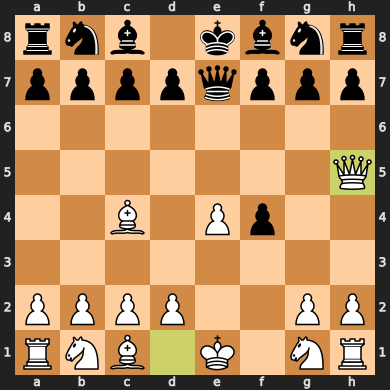

In [25]:
board

In [26]:
def get_attackers(board, player, target_square):
    attacking_pieces=[]
    for square in board.attackers(player, target_square):
        attacking_pieces.append(board.piece_at(square))
    return attacking_pieces

In [27]:
def get_pieces(piece_list):
    """
    piece: P, N, B, R, Q, K
    index: 0, 1, 1, 2, 3, 4
    """
    new_piece_arr=np.zeros(5)
    for piece in piece_list:
        piecetype = piece.piece_type-1 if piece.piece_type<3 else piece.piece_type-2
        new_piece_arr[piecetype]+=1
    return new_piece_arr

In [28]:
def check_control(board, player, target_square):
    # get white attackers
    defenders = get_pieces(get_attackers(board, player, target_square))
    attackers = get_pieces(get_attackers(board, not player, target_square))
    
    control_list=defenders-attackers
    prefixsum=0
    for i in range(len(control_list)):
        prefixsum+=control_list[i]
        if np.abs(prefixsum)>1:
            return np.sign(prefixsum)
    return np.sign(prefixsum)

In [29]:
get_pieces(get_attackers(board, chess.WHITE, chess.D5))

array([1., 1., 0., 1., 0.])

In [30]:
board.reset()
board.push(chess.Move.from_uci('e2e4'))
board.push(chess.Move.from_uci('e7e5'))
board.push(chess.Move.from_uci('f2f4'))
board.push(chess.Move.from_uci('e5f4'))
board.push(chess.Move.from_uci('f1c4'))
board.push(chess.Move.from_uci('d8e7'))
board.push(chess.Move.from_uci('d1h5'))
board.push(chess.Move.from_uci('e7d8'))

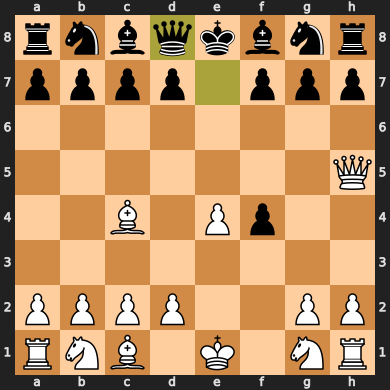

In [31]:
board

In [32]:
check_control(board, chess.WHITE, chess.F7)

1.0

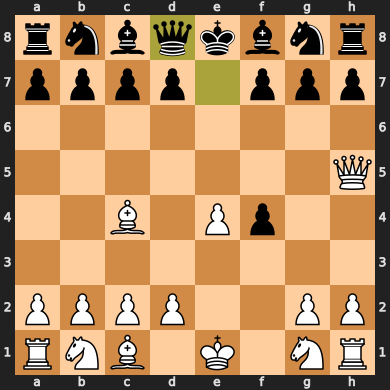

In [33]:
board

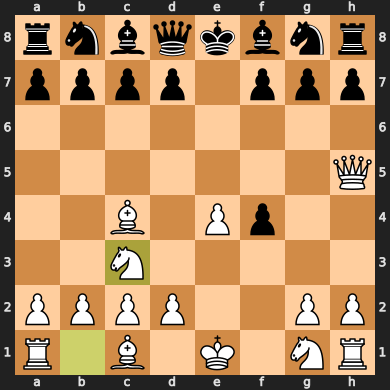

In [34]:
board.push(chess.Move.from_uci('b1c3'))
board

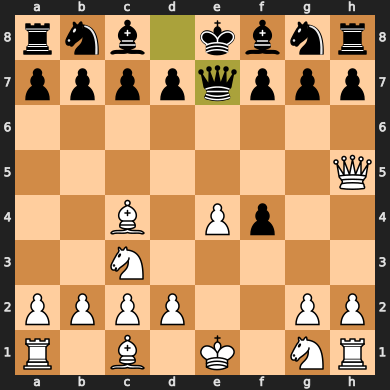

In [35]:
temp_board=deepcopy(board)
temp_board.push(chess.Move.from_uci('d8e7'))
temp_board

In [36]:
attacking_pieces=get_attackers(board, chess.WHITE, chess.D5)
attacking_pieces_list=get_pieces(attacking_pieces)
print(attacking_pieces_list)

[1. 2. 0. 1. 0.]


In [37]:
not chess.WHITE

False

In [38]:
def is_control(board, player, target_square):
    '''
    takes boolean player and target_square as input
    returns 1 if target_square is controlled by player
    returns 0 if target_square is contested by both players
    returns -1 if target_square is controlled by opponent
    '''
    if len(board.attackers(player, target_square))>len(board.attackers(not player, target_square)):
        return 1
    elif len(board.attackers(player, target_square))==len(board.attackers(not player, target_square)):
        return 0
    else:
        return -1

In [39]:
print(chess.PieceType(chess.KING))

6


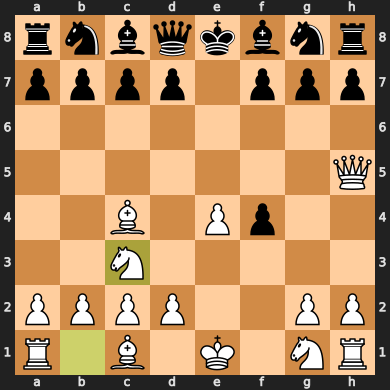

In [40]:
board

In [41]:
def fen_flip_turn(fen_str):
    x=fen_str.split()
    x[1]='w' if x[1]=='b' else 'b'
    return ' '.join(x)

In [42]:
def get_best_threat(board):
    eng_board=deepcopy(board)
    eng_fen=fen_flip_turn(eng_board.fen())
    eng_board.set_fen(eng_fen)
    eng_move=stockfish.play(eng_board, chess.engine.Limit(time=0.1))
    # if you want to return uci string use eng_move.move.uci()
    return eng_move.move

In [43]:
move=get_best_threat(board)
print(move.to_square)
print(chess.square_name(move.to_square))

53
f7


In [44]:
def comment_threat(board):
    threat_move=get_best_threat(board)
    print(f'Threatens to play {threat_move.uci()}')

def comment_attack(board, move):
    threat_move=get_best_threat(board)
    target_square=threat_move.to_square
    current_piece_square=move.to_square
    if current_piece_square in board.attackers(not board.turn, target_square):
        print(f'{board.piece_at(current_piece_square)} attacks {chess.square_name(target_square)}')
        

In [45]:
for attacker in board.attackers(True ,53):
    print(attacker)

print(chess.square_name(53))
print(24 in board.attackers(True ,53))
print(board.piece_at(26))

26
39
f7
False
B


In [46]:
board.turn

False

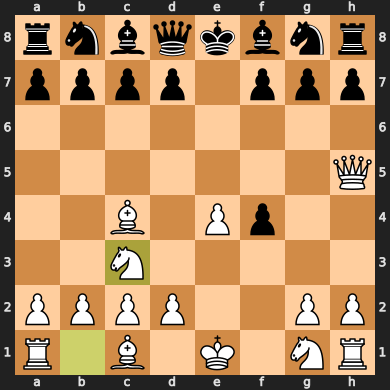

In [47]:
board

In [48]:
comment_threat(board)
comment_attack(board, chess.Move.from_uci('d1h5'))

Threatens to play h5f7
Q attacks f7


In [49]:
def is_attacked(board, target_square):
    """
    takes board object and a target square as input
    returns True if the piece at that target square is attacked else False
    if there is no piece at that target square - return False
    """
    target_piece=board.piece_at(target_square)
    attacker_color=not target_piece.color
    t_piece_rank=np.argwhere(get_pieces([target_piece])==1).item()
    
    if not get_attackers(board, attacker_color, target_square):
        return False
    
    t_attacker_rank=np.min(np.argwhere(get_pieces(get_attackers(board, attacker_color, target_square))==1).flatten())
    # print(f't_piece_rank: {t_piece_rank}, t_attacker_rank: {t_attacker_rank}')
    if t_piece_rank>t_attacker_rank:
        return True
    elif check_control(board, attacker_color, target_square)==1: 
        return True
    else:
        return False
    
def get_best_threat(board):
    eng_board=deepcopy(board)
    eng_fen=fen_flip_turn(eng_board.fen())
    eng_board.set_fen(eng_fen)
    eng_move=stockfish.play(eng_board, chess.engine.Limit(time=0.1))
    # if you want to return uci string use eng_move.move.uci()
    return eng_move.move

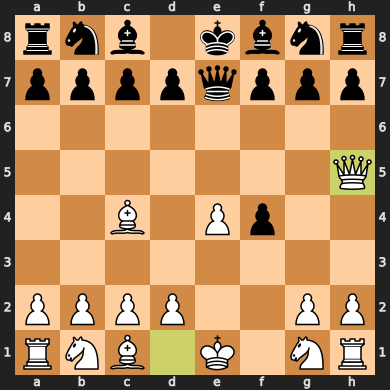

In [50]:
board.reset()
board.push(chess.Move.from_uci('e2e4'))
board.push(chess.Move.from_uci('e7e5'))
board.push(chess.Move.from_uci('f2f4'))
board.push(chess.Move.from_uci('e5f4'))
board.push(chess.Move.from_uci('f1c4'))
board.push(chess.Move.from_uci('d8e7'))
board.push(chess.Move.from_uci('d1h5'))
board

Threatens to play h5e2
Q attacks e2


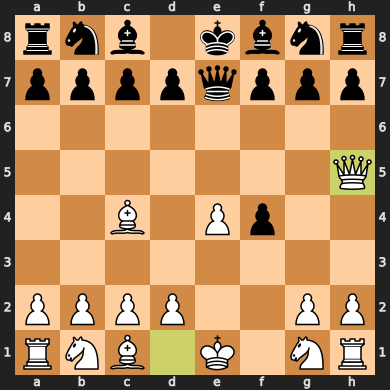

In [51]:
comment_threat(board)
comment_attack(board, chess.Move.from_uci('d1h5'))
board

In [52]:
board.turn

False

Threatens to play h5e2
Q attacks e2


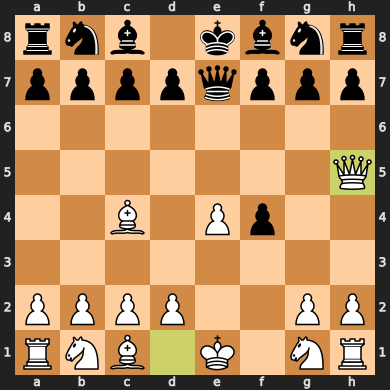

In [53]:
comment_threat(board)
comment_attack(board, chess.Move.from_uci('d1h5'))
board

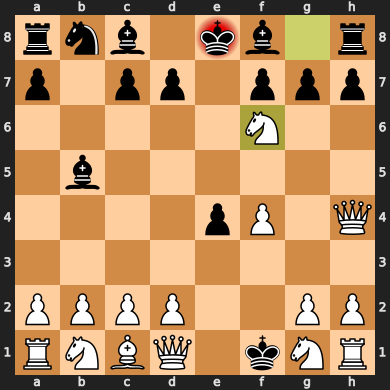

In [54]:
board.reset_board()
for i, move in enumerate(game.mainline_moves()):
    if i==10:
        break
    board.push(move)
board

In [55]:
game_pgn = open("../famous-games/anderssen_kieseritzky_1851.pgn")
game=pgn.read_game(game_pgn)

In [56]:
board=game.board()
moves=iter(game.mainline_moves())

Threatens to play e7e5


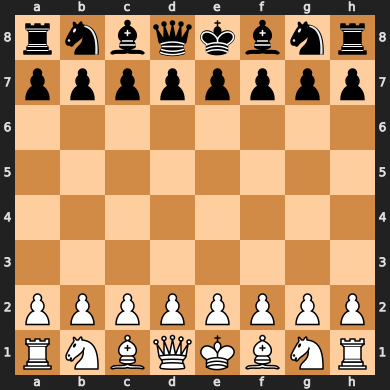

In [57]:
comment_threat(board)
comment_attack(board, chess.Move.from_uci('d1h5'))
board

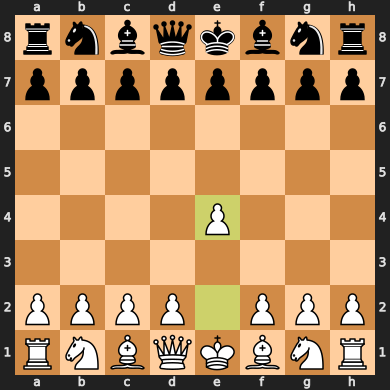

In [58]:
board.push(next(moves))
board

In [59]:
comment_threat(board)

Threatens to play d2d4


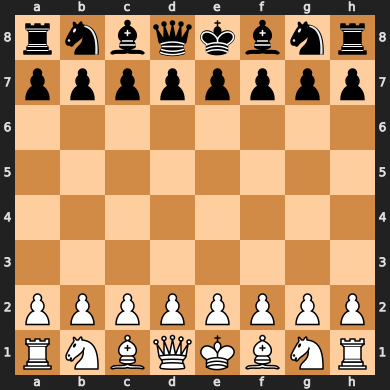

In [60]:
game_pgn = open("../famous-games/anderssen_kieseritzky_1851.pgn")
game=pgn.read_game(game_pgn)
board=game.board()
moves=iter(game.mainline_moves())
board

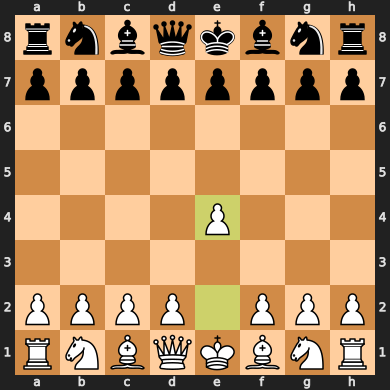

In [61]:
board.push(next(moves))
board

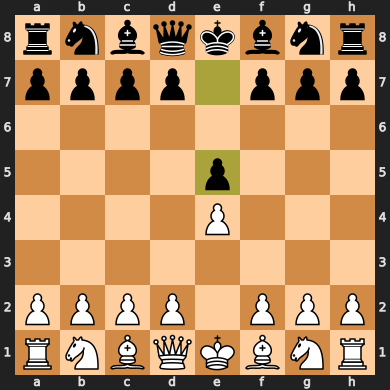

In [62]:
board.push(next(moves))
board

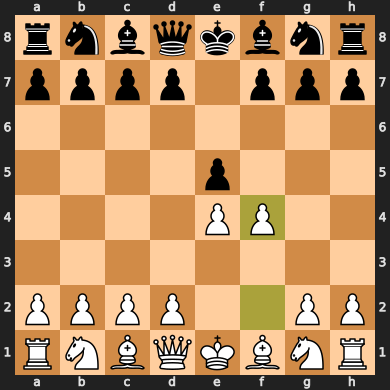

In [63]:
board.push(next(moves))
board

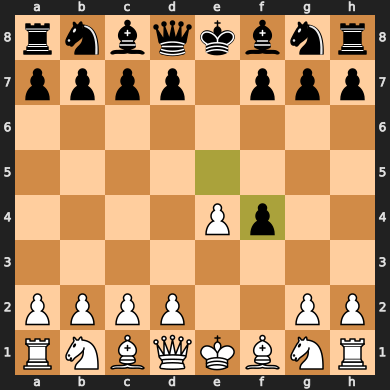

In [64]:
board.push(next(moves))
board

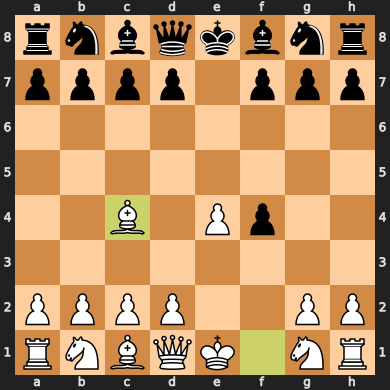

In [65]:
board.push(next(moves))
board

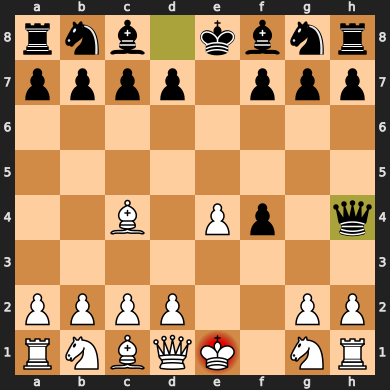

In [66]:
board.push(next(moves))
board

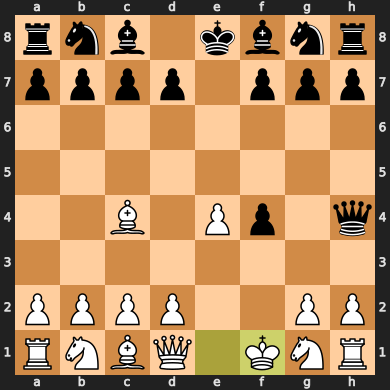

In [67]:
board.push(next(moves))
board

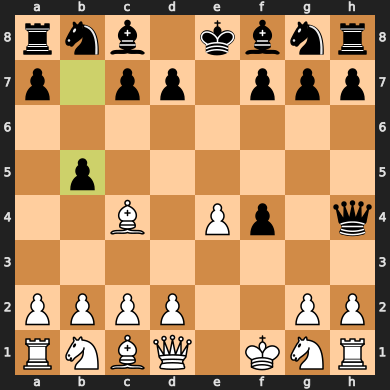

In [68]:
board.push(next(moves))
board

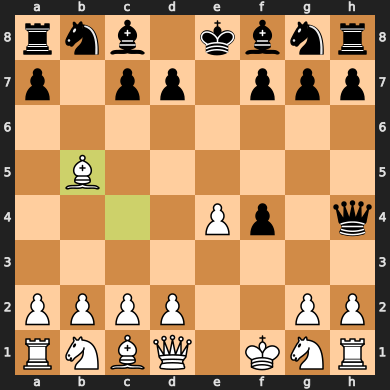

In [69]:
board.push(next(moves))
board

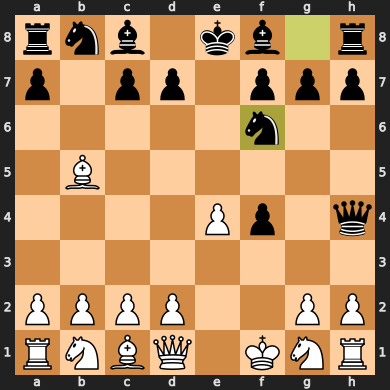

In [70]:
board.push(next(moves))
board

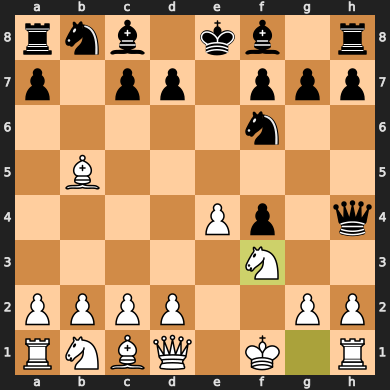

In [71]:
board.push(next(moves))
board

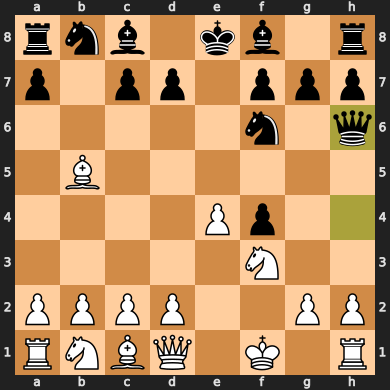

In [72]:
board.push(next(moves))
board

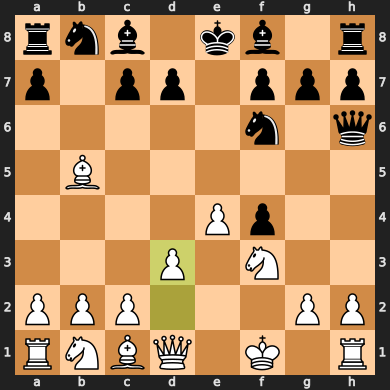

In [73]:
board.push(next(moves))
board

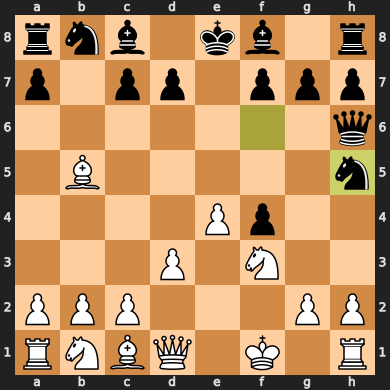

In [74]:
board.push(next(moves))
board

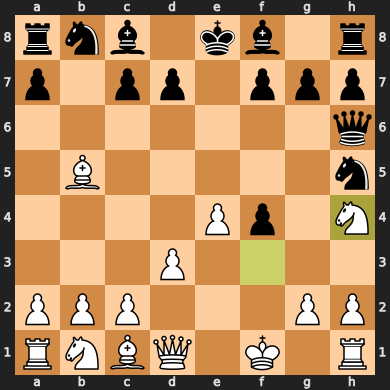

In [75]:
board.push(next(moves))
board

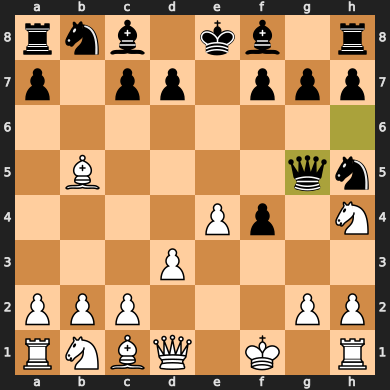

In [76]:
board.push(next(moves))
board

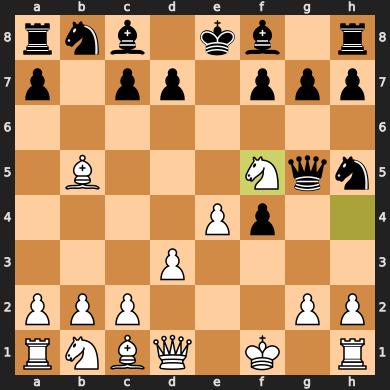

In [77]:
board.push(next(moves))
board

In [78]:
board.gives_check(chess.Move.from_uci('f5d6'))

False

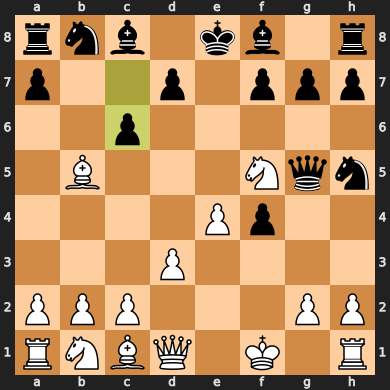

In [79]:
board.push(next(moves))
board

In [80]:
board.gives_check(chess.Move.from_uci('g5g2'))
print(board.turn)

True


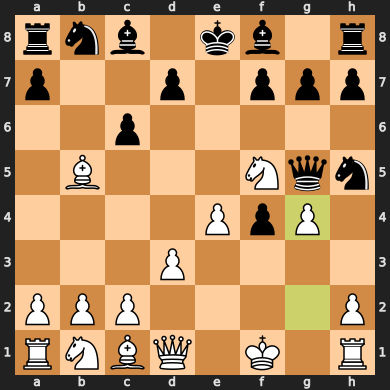

In [81]:
board.push(next(moves))
board

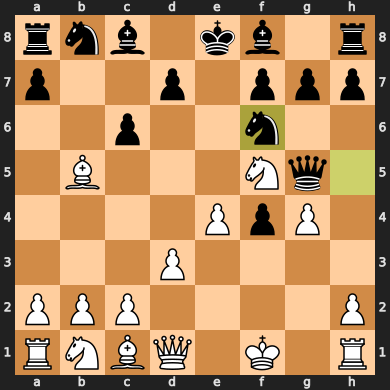

In [82]:
board.push(next(moves))
board

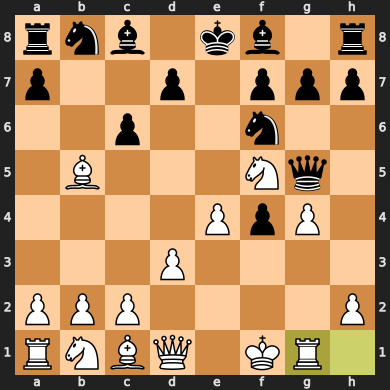

In [83]:
board.push(next(moves))
board

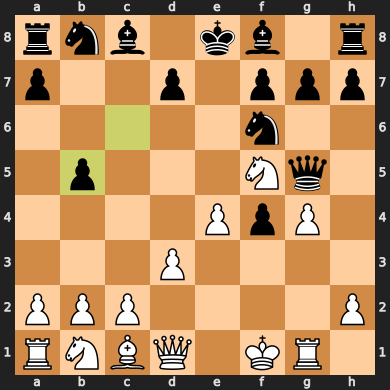

In [84]:
board.push(next(moves))
board

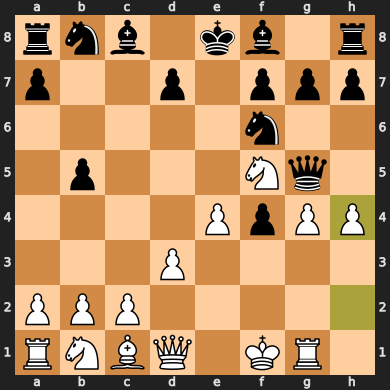

In [85]:
board.push(next(moves))
board

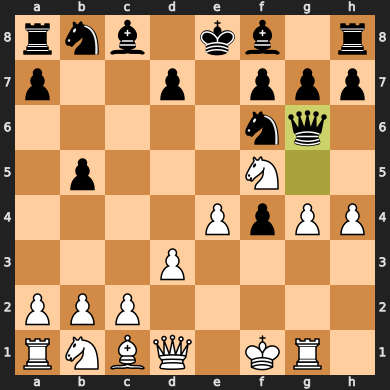

In [86]:
board.push(next(moves))
board

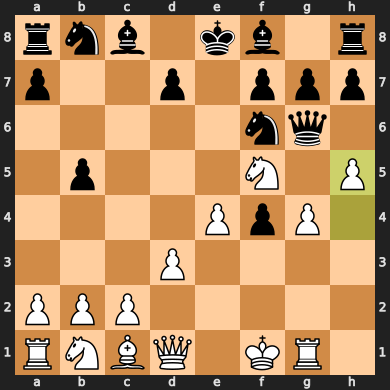

In [87]:
board.push(next(moves))
board

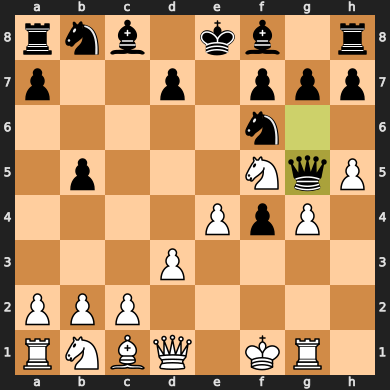

In [88]:
board.push(next(moves))
board

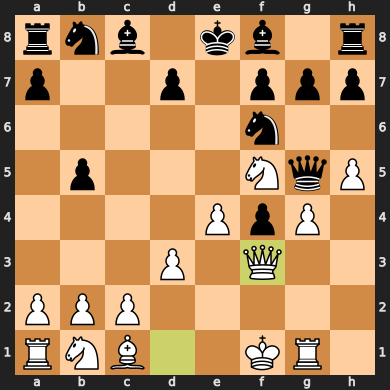

In [89]:
board.push(next(moves))
board

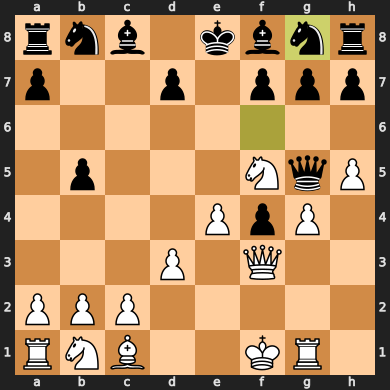

In [90]:
board.push(next(moves))
board

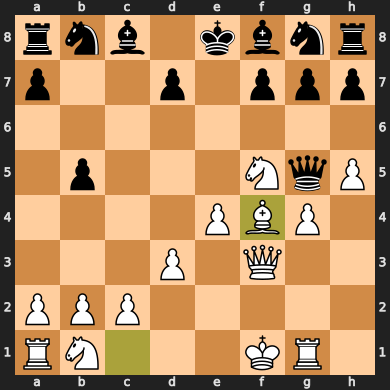

In [91]:
board.push(next(moves))
board

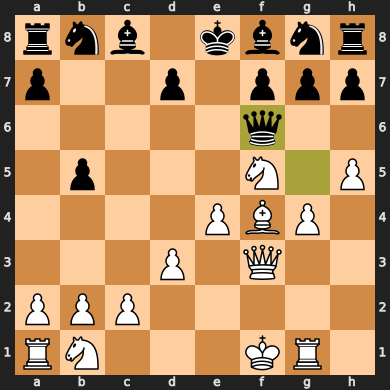

In [92]:
board.push(next(moves))
board

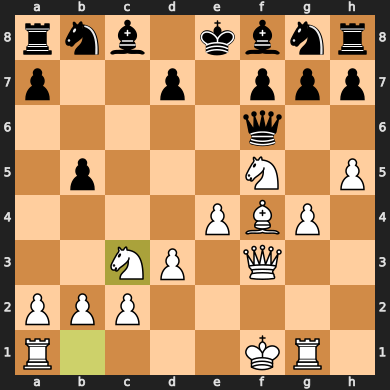

In [93]:
board.push(next(moves))
board

In [94]:
board.turn

False

In [95]:
get_best_threat(board)

Move.from_uci('c3b5')

In [96]:
board.turn

False

In [97]:
comment_threat(board)
comment_attack(board, chess.Move.from_uci('f8c5'))

Threatens to play c3b5


In [98]:
get_best_threat(board)

Move.from_uci('c3b5')

In [ ]:
comment_threat(board)
comment_attack(board, chess.Move.from_uci('d1h5'))

In [ ]:
print(board.turn)
board


In [ ]:
def commentary(board, move):
    '''
    1. get commentary for attacked pieces
    2. get commentary for defended pieces
    '''
    # TODO: commentary for positional chess - rook on open file
    # rof=[]
    
    commentary_str=[]
    
    # commentary for an attacked piece
    attacks=[]
    # commentary for a defended piece
    defends=[]
    # commentary for positional chess - bishop on long diagonal
    bld=[]
    # commentary for positional chess - knight on central square
    kcs=[]
    # commentary for positional chess - queen on central square
    qcs=[]
    # commentary for positional chess - activate pieces
    activate=[]
    
    old_attacked_squares=board.attacks(move.from_square)
    old_unattacked_squares = list(set(list(range(64)))-set(board.attacks(move.from_square)))
    new_attacked_squares=get_critical_controlled_squares(board, move)
    print('sqs:', [chess.square_name(sq) for sq in (set(old_unattacked_squares) & set(new_attacked_squares))])
    for square in (set(old_unattacked_squares) & set(new_attacked_squares)):
        if board.color_at(square) is not board.turn:
            attacks.append(f'{board.piece_at(move.from_square)} attacks {board.piece_at(square)} at {chess.square_name(square)}')
        elif board.color_at(square) is board.turn:
            defends.append(f'{board.piece_at(move.from_square)} defends {board.piece_at(square)} at {chess.square_name(square)}')
    
    if check_bishop_ld(board, move):
        bld.append('Places Bishop on long diagonal')
    
    if check_activate_pieces(board, move):
        activate.append('Activates piece(s)')
        
    if check_knight_central(board, move):
        kcs.append('Places Knight on central square')
    
    if check_queen_central(board, move):
        qcs.append('Places Queen on central square')
    
    commentary_str=attacks+defends+activate+bld+kcs+qcs
    return commentary_str

In [ ]:
def get_critical_controlled_squares(board, move):
    '''
    takes board object and a move object as input
    returns a list of unique controlled squares wrt that specific move
    '''
    board.push(move)
    attacked_squares=board.attacks(move.to_square)
    critical_att_squares=[]
    for sqaure in (set(attacked_squares) & set(get_all_critical_squares(board))):
        # intersection of 2 sets -> attacked squares and all critical squares
        critical_att_squares.append(sqaure)
    board.pop()
    return critical_att_squares

def get_all_critical_squares(board):
    '''
    takes board object as input
    returns a list of unique critical squares -> 
    critical_occupied_squares+critical_empty_squares+hanging_squares
    '''
    return list(set(check_critical_occupied_squares(board)+check_critical_empty_squares(board)+check_hanging_squares(board)))

def check_critical_occupied_squares(board):
    '''
    takes board object as input
    uses the criterion = (piece score) * (number of attackers) to compute the most critical squares
    returns a list of occupied squares with highest criterion
    '''
    critical_squares={}
    for sq in range(64):
        # count number of pieces attacking a given square
        count=0
        if board.piece_at(sq):
            count=len(board.attackers(not board.color_at(sq), sq))
            critical_squares[sq]=piece_score[board.piece_at(sq).symbol()]*count
#     for sq, count in critical_squares.items():
#         print(f'{chess.square_name(sq)}: {count}')
    max_value = max(critical_squares.values())
    return [key for key, value in critical_squares.items() if value == max_value]

def check_critical_empty_squares(board):
    '''
    takes board object as input
    returns a list of empty squares with the highest number of attackers
    '''
    critical_squares={}
    for sq in range(64):
        # count number of pieces attacking a given square
        count=0
        if not board.piece_at(sq):
            count=len(board.attackers(not board.turn, sq))
            critical_squares[sq]=count
#     for sq, count in critical_squares.items():
#         print(f'{chess.square_name(sq)}: {count}') 
    max_value = max(critical_squares.values())
    return [key for key, value in critical_squares.items() if value == max_value]

def check_hanging_squares(board, color=None):
    '''
    takes board object, player color as input
    returns a list of squares containing hanging pieces of given color
    '''
    hanging_squares=[]
    if color is not None:
        for sq in range(64):
            if board.piece_at(sq) and board.color_at(sq)==color:
                if is_attacked(board, sq):
                    hanging_squares.append(sq)
    else:
        for sq in range(64):
            if board.piece_at(sq):
                if is_attacked(board, sq):
                    hanging_squares.append(sq)        
    return hanging_squares

def check_bishop_ld(board, move):
    '''
    check is bishop was put on long diagonal from a passive position
    '''
    diag_a1_h8=list(range(0,64,9))
    diag_a2_g8=list(range(8,63,9))
    diag_b1_h7=list(range(1,56,9))
    diag_h1_a8=list(range(7,57,7))
    diag_g1_a7=list(range(6,49,7))
    diag_h2_b8=list(range(15,58,7))
    all_diags=diag_a1_h8+diag_a2_g8+diag_b1_h7+diag_h1_a8+diag_g1_a7+diag_h2_b8
    if board.piece_at(move.from_square).symbol().lower()=='b':
        if move.from_square not in all_diags and move.to_square in all_diags:
            return True
    return False
        
def check_activate_pieces(board, move):
    '''
    takes board object and move as input
    returns True if the move leads to +5 more controlled squares on the board
    '''
    old_control_count=0
    for i in range(64):
        old_control_count+=is_control(board, board.turn, i)
    new_control_count=0
    board.push(move)
    for i in range(64):
        new_control_count+=is_control(board, not board.turn, i)
    board.pop()
    if new_control_count>old_control_count+5:
        return True
    else:
        return False
                    
def check_rook_of(board, move):
    '''
    TODO: check if rook was placed on open file
    '''
    pass

def check_knight_central(board, move):
    '''
    check if knight was placed on a central square
    '''
    if board.piece_at(move.from_square).symbol().lower()=='n':
        if move.from_square not in central_squares and move.to_square in central_squares:
            return True
    return False

def check_queen_central(board, move):
    '''
    check if queen was placed on a central sqaure
    '''
    if board.piece_at(move.from_square).symbol().lower()=='q':
        if move.from_square not in central_squares and move.to_square in central_squares:
            return True
    return False

def check_response_against_threat():
    '''
    check if a new move responds to a threat by counterattacking or defending
    '''
    pass
    

In [ ]:
board

In [ ]:
# print(check_critical_occupied_squares(board))
# print(check_critical_empty_squares(board))
# print(check_hanging_squares(board, chess.BLACK))
# print(get_all_critical_squares(board))
# print(get_critical_controlled_squares(board, chess.Move.from_uci('f8c5')))
commentary_str=commentary(board, chess.Move.from_uci('f8c5'))
for comment in commentary_str:
    print(comment)

In [ ]:
# comment_threat(board)
check_attack(board, chess.Move.from_uci('f8c5'))

In [ ]:
# comment_attack(board, chess.Move.from_uci('g7g6'))
print(board.turn)
board

In [ ]:
print(board.color_at(0))

In [ ]:
'A'.lower()

In [ ]:
board.piece_at(0).symbol()

In [ ]:
board

In [ ]:
print(board.color_at(1))

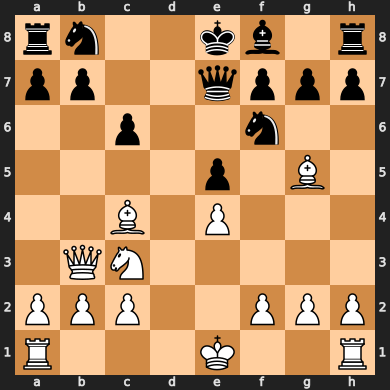

In [6]:
fen_str = 'rn2kb1r/pp2qppp/2p2n2/4p1B1/2B1P3/1QN5/PPP2PPP/R3K2R b KQkq - 1 9'
board = chess.Board(fen_str)
board

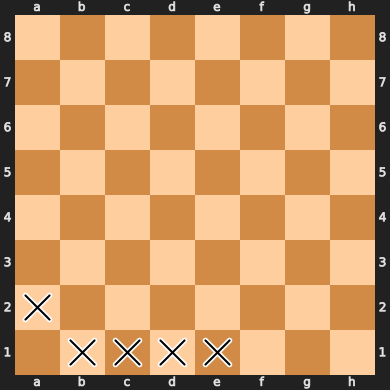

In [9]:
board.attacks(0)

In [17]:
att_sqs=[]
for sq in board.attacks(0):
    if board.piece_at(sq)!=None and board.piece_at(sq).color is True:
        continue
    att_sqs.append(sq)
att_sqs

[1, 2, 3]

In [23]:
print(board.piece_at(0).symbol().lower())

r


In [19]:
for i in range(3):
    print('a')
    for i in range(4):
        if i==2:
            break
        print(i)

a
0
1
a
0
1
a
0
1


In [25]:
print('k'.isupper())

False


In [26]:
chess.square_name(1)

'b1'